## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

## Import Zillow Data

In [2]:
# Load target data
home_prices = pd.read_csv('raw_data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

home_prices.head()

In [17]:
nashville_df = home_prices[(home_prices['City']=="Nashville") & (home_prices['State']=='TN')]
nashville_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0
1349,74178,1362,37115,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,83431.0,...,221906.0,223547.0,225470.0,227345.0,229725.0,231768.0,233924.0,236437.0,238750.0,240945.0
1935,74238,1951,37207,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,88757.0,...,260175.0,262039.0,264413.0,267231.0,271242.0,275291.0,279386.0,283637.0,287225.0,290689.0
2201,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,90986.0,...,256530.0,258352.0,260171.0,262305.0,264870.0,267812.0,270533.0,273683.0,276198.0,278854.0
2451,74234,2471,37203,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147659.0,...,434632.0,436116.0,437853.0,440109.0,442457.0,444604.0,446004.0,447759.0,448556.0,449048.0
2621,74248,2645,37217,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,87304.0,...,228782.0,230040.0,231415.0,232757.0,234680.0,236802.0,238992.0,241559.0,243559.0,245680.0


## Import Airbnb Data

In [4]:
listing_files = glob('raw_data/airbnb/listings/*.csv.gz')
listing_files

['raw_data/airbnb/listings\\listings_10_15.csv.gz',
 'raw_data/airbnb/listings\\listings_10_18.csv.gz',
 'raw_data/airbnb/listings\\listings_10_19.csv.gz',
 'raw_data/airbnb/listings\\listings_10_20.csv.gz',
 'raw_data/airbnb/listings\\listings_11_18.csv.gz',
 'raw_data/airbnb/listings\\listings_11_19.csv.gz',
 'raw_data/airbnb/listings\\listings_11_20.csv.gz',
 'raw_data/airbnb/listings\\listings_12_18.csv.gz',
 'raw_data/airbnb/listings\\listings_12_19.csv.gz',
 'raw_data/airbnb/listings\\listings_12_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_19.csv.gz',
 'raw_data/airbnb/listings\\listings_1_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_21.csv.gz',
 'raw_data/airbnb/listings\\listings_2_19.csv.gz',
 'raw_data/airbnb/listings\\listings_2_20.csv.gz',
 'raw_data/airbnb/listings\\listings_2_21.csv.gz',
 'raw_data/airbnb/listings\\listings_3_19.csv.gz',
 'raw_data/airbnb/listings\\listings_3_20.csv.gz',
 'raw_data/airbnb/listings\\listings_4_18.csv.gz',
 'raw_data/airbnb/lis

In [132]:
dfs = []
for file in listing_files:
    df = pd.read_csv(file, index_col=0, header=0)
    dfs.append(df)

In [133]:
airbnb_df = pd.concat(dfs, axis=0, ignore_index=True)

In [137]:
print(airbnb_df.columns)

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'bathrooms_text',
       'number_of_reviews_l30d', 'last_searched', 'region_id', 'region_name',
       'region_parent_id'],
      dtype='object', length=111)


In [135]:
#can use last scraped as a proxy for date
airbnb_df.last_scraped.value_counts()

2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
              ... 
2020-10-01       1
2019-07-15       1
2020-09-06       1
2019-10-11       1
2021-02-25       1
Name: last_scraped, Length: 77, dtype: int64

In [121]:
# listing_files_dict = {}
# for filename in listing_files:
#     clean_filename = os.path.basename(filename).replace('.csv', '').replace('.','_').replace('gz','df')
#     filename_df = pd.read_csv(filename, index_col = 0)
#     listing_files_dict[clean_filename] = filename_df

In [7]:
reviews_df = pd.read_csv('raw_data/airbnb/reviews_2_21.csv.gz', compression='gzip')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [9]:
calendar_df = pd.read_csv('raw_data/airbnb/calendar_2_21.csv.gz', compression='gzip')
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


## Clean Zillow Data

In [18]:
nashville_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [67]:
nashville_prices_df = nashville_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 
                                                 'StateName', 'State', 'City', 'Metro', 'CountyName'])

In [68]:
nashville_prices_df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [69]:
nashville_prices_df.set_index('RegionName', inplace=True)
nashville_prices_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,116199.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,112514.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,155079.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,114305.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,116427.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [70]:
nashville_prices_df = nashville_prices_df.transpose()
nashville_prices_df.head()

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [71]:
nashville_prices_df.reset_index(inplace=True)
nashville_prices_df.head()

RegionName,index,37013,37211,37221,37209,37076,37115,37207,37214,37203,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
0,1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1,1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
2,1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
3,1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
4,1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [72]:
nashville_prices_df['index'] = pd.to_datetime(nashville_prices_df['index'])

In [75]:
nashville_prices_df.set_index('index', inplace=True)
nashville_prices_df

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-30,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-31,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


<AxesSubplot:xlabel='index'>

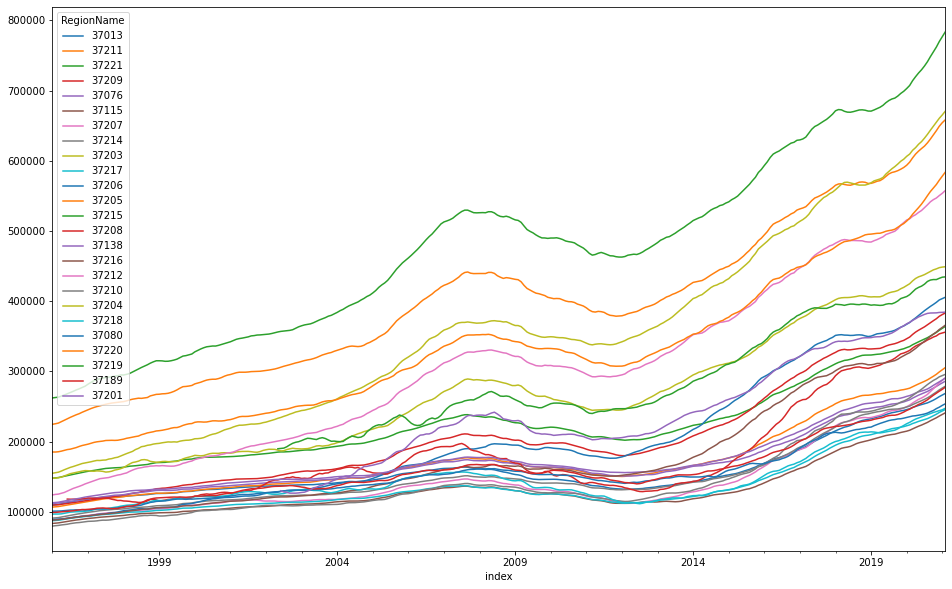

In [78]:
nashville_prices_df.plot(figsize = (16,10), subplots=False, legend=True);

## Clean Airbnb Data

In [140]:
airbnb_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
airbnb_df.zipcode.value_counts()

37203           28656
37206           24376
37212           14365
37219           12586
37208           12510
                ...  
37213.0             2
37240               1
37206\n37206        1
37026               1
37143.0             1
Name: zipcode, Length: 86, dtype: int64

In [155]:
airbnb_df.property_type.value_counts()

House                       83494
Apartment                   48013
Condominium                 15571
Townhouse                   15067
Entire house                13731
                            ...  
Castle                          4
Hut                             3
Shared room in townhouse        1
Private room                    1
Cave                            1
Name: property_type, Length: 90, dtype: int64

In [158]:
airbnb_df.accommodates.value_counts()

4     54451
2     39250
6     38933
10    22595
8     21328
12    17915
3     10844
5     10677
16     4646
7      4612
1      3885
9      2356
14      652
11      538
13      193
15      175
20      169
24       71
22       25
37       24
48       16
30       14
36       11
80       10
32        8
17        5
18        4
25        2
35        1
0         1
Name: accommodates, dtype: int64

In [156]:
airbnb_df.room_type.value_counts()

Entire home/apt    198817
Private room        32089
Hotel room           1458
Shared room          1047
Name: room_type, dtype: int64

In [159]:
airbnb_df.bed_type.value_counts()

Real Bed         189710
Pull-out Sofa       396
Futon               370
Airbed              220
Couch                76
Name: bed_type, dtype: int64

In [161]:
airbnb_df.square_feet.value_counts()

1000.0    120
1500.0     58
0.0        52
1200.0     33
800.0      32
600.0      31
690.0      31
300.0      31
374.0      29
2600.0     29
650.0      29
400.0      28
1260.0     26
1400.0     25
168.0      24
1380.0     24
850.0      14
900.0      12
750.0      10
1.0         6
1800.0      6
350.0       5
270.0       5
3500.0      4
2700.0      4
1770.0      4
256.0       3
5000.0      1
2300.0      1
120.0       1
1450.0      1
Name: square_feet, dtype: int64

In [163]:
airbnb_df.guests_included.value_counts()

1.0     92478
2.0     33162
4.0     24054
6.0     15731
8.0      8971
10.0     5058
3.0      3737
5.0      2864
12.0     1959
16.0      922
7.0       871
9.0       306
0.0       162
14.0      152
11.0      147
13.0       60
20.0       60
35.0       25
15.0       22
24.0       12
48.0        7
32.0        7
30.0        5
Name: guests_included, dtype: int64

In [169]:
airbnb_df.region_name.value_counts()

Davidson    1735
Cheatham       1
Name: region_name, dtype: int64

In [139]:
for col_name in airbnb_df.columns:
    print(col_name)

listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_revie

In [220]:
# create df of columns to be used in regression
reg_airbnb_df = airbnb_df[['last_scraped','host_id','neighbourhood_cleansed', 'zipcode',
                          'latitude','longitude','property_type','room_type','accommodates',
                          'bathrooms','bedrooms','beds','bed_type','square_feet','price','weekly_price',
                          'monthly_price','guests_included','minimum_nights','maximum_nights','number_of_reviews']].copy()

In [221]:
reg_airbnb_df.head()

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,beds,bed_type,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,2015-10-03,30066816,District 1,37080,36.274038,-86.910077,House,Entire home/apt,2,1.0,...,1.0,Real Bed,NaN,$125.00,$800.00,NaN,2.0,2.0,1125.0,19
1,2015-10-03,55304,District 1,37189,36.259632,-86.870691,House,Private room,4,1.0,...,3.0,Real Bed,NaN,$75.00,$315.00,"$1,113.00",1.0,1.0,1125.0,0
2,2015-10-03,3155867,District 1,37218,36.217547,-86.843971,House,Private room,2,0.5,...,1.0,Real Bed,NaN,$45.00,$315.00,"$1,000.00",1.0,2.0,1125.0,60
3,2015-10-03,1356379,District 1,37218,36.212933,-86.853004,House,Private room,2,1.0,...,1.0,Real Bed,NaN,$150.00,NaN,NaN,2.0,1.0,1125.0,0
4,2015-10-03,5479170,District 1,37218,36.221009,-86.873935,House,Private room,1,2.0,...,1.0,Pull-out Sofa,NaN,$150.00,$300.00,$500.00,1.0,1.0,1125.0,4


In [222]:
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_scraped            233411 non-null  object 
 1   host_id                 233411 non-null  int64  
 2   neighbourhood_cleansed  233411 non-null  object 
 3   zipcode                 189855 non-null  object 
 4   latitude                233411 non-null  float64
 5   longitude               233411 non-null  float64
 6   property_type           233410 non-null  object 
 7   room_type               233411 non-null  object 
 8   accommodates            233411 non-null  int64  
 9   bathrooms               190749 non-null  float64
 10  bedrooms                224183 non-null  float64
 11  beds                    226529 non-null  float64
 12  bed_type                190772 non-null  object 
 13  square_feet             679 non-null     float64
 14  price               

### Change datatype of price columns

In [223]:
def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [224]:
cols_to_convert = ['price', 'weekly_price', 'monthly_price']

for col in cols_to_convert:
    reg_airbnb_df = convert_dol_to_float(reg_airbnb_df, col)

In [225]:
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   last_scraped            233411 non-null  object 
 1   host_id                 233411 non-null  int64  
 2   neighbourhood_cleansed  233411 non-null  object 
 3   zipcode                 189855 non-null  object 
 4   latitude                233411 non-null  float64
 5   longitude               233411 non-null  float64
 6   property_type           233410 non-null  object 
 7   room_type               233411 non-null  object 
 8   accommodates            233411 non-null  int64  
 9   bathrooms               190749 non-null  float64
 10  bedrooms                224183 non-null  float64
 11  beds                    226529 non-null  float64
 12  bed_type                190772 non-null  object 
 13  square_feet             679 non-null     float64
 14  price               

### Make sure zipcode values are correct

In [233]:
reg_airbnb_df.neighbourhood_cleansed.value_counts()

District 19    56302
District 17    26691
District 6     21812
District 5     19131
District 21    18537
District 7     11565
District 18    11230
District 15     8882
District 24     6752
District 20     6015
District 16     5155
District 8      4660
District 2      4644
District 25     3336
District 13     2786
District 26     2465
District 1      1919
District 12     1917
District 14     1844
District 27     1556
District 29     1510
District 10     1365
District 4      1357
District 35     1341
District 23     1291
District 3      1262
District 11     1194
District 22     1164
District 30     1010
District 33      856
District 34      853
District 32      804
District 31      754
District 9       730
District 28      721
Name: neighbourhood_cleansed, dtype: int64

In [234]:
reg_airbnb_df.neighbourhood_cleansed.isna().sum()

0

In [226]:
reg_airbnb_df.zipcode.value_counts()

37203           28656
37206           24376
37212           14365
37219           12586
37208           12510
                ...  
37213.0             2
37240               1
37206\n37206        1
37026               1
37143.0             1
Name: zipcode, Length: 86, dtype: int64

In [232]:
reg_airbnb_df.zipcode.isna().sum()

43556

### Need to convert/insert missing zipcode values based on neighborhoods

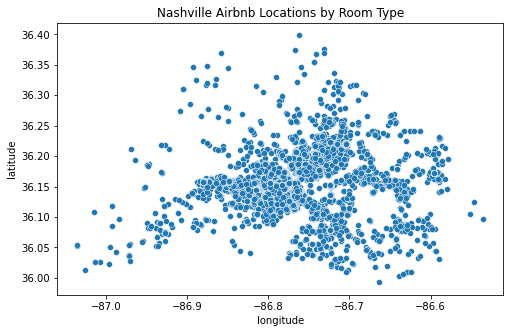

In [239]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='zipcode')
ax.set_title('Nashville Airbnb Locations by Room Type');

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


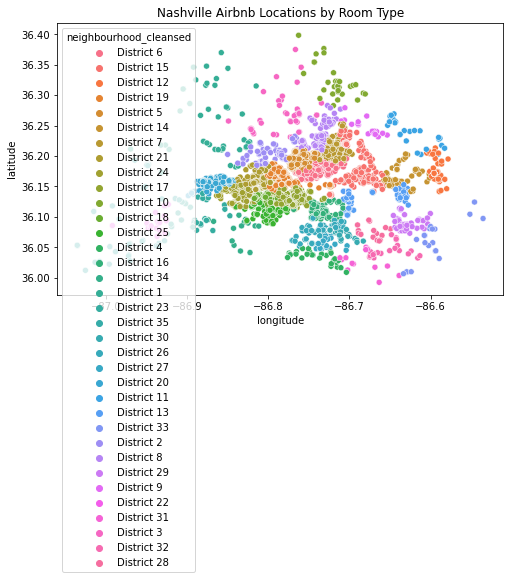

In [240]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='neighbourhood_cleansed')
ax.set_title('Nashville Airbnb Locations by Room Type');

In [235]:
neighborhood_zip = reg_airbnb_df[['zipcode','neighbourhood_cleansed']]

In [236]:
neighborhood_zip.head()

,zipcode,neighbourhood_cleansed
0,37080,District 1
1,37189,District 1
2,37218,District 1
3,37218,District 1
4,37218,District 1


In [230]:
reg_airbnb_df['zipcode'].astype('int')

ValueError: cannot convert float NaN to integer

### Drop/Handle Missing Values

### Convert Date to DateTime type

In [205]:
reg_airbnb_df['last_scraped'] = pd.to_datetime(reg_airbnb_df['last_scraped'],format='%Y/%m/%d')
reg_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   last_scraped            233411 non-null  datetime64[ns]
 1   host_id                 233411 non-null  int64         
 2   neighbourhood_cleansed  233411 non-null  object        
 3   zipcode                 189855 non-null  object        
 4   latitude                233411 non-null  float64       
 5   longitude               233411 non-null  float64       
 6   property_type           233410 non-null  object        
 7   room_type               233411 non-null  object        
 8   accommodates            233411 non-null  int64         
 9   bathrooms               190749 non-null  float64       
 10  bedrooms                224183 non-null  float64       
 11  beds                    226529 non-null  float64       
 12  bed_type                190772

In [209]:
current_listings_df = reg_airbnb_df[reg_airbnb_df['last_scraped']>'2021-02']

Text(0.5, 1.0, 'Nashville Airbnb Locations by Room Type')

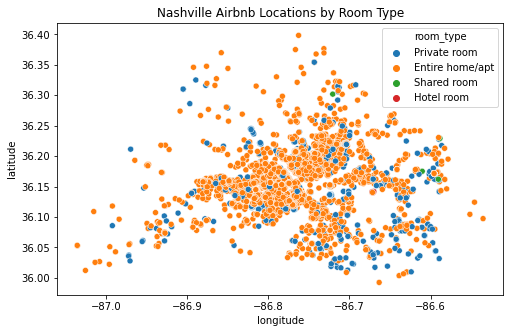

In [212]:
import seaborn as sns
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=current_listings_df, x='longitude', y='latitude', hue='room_type')
ax.set_title('Nashville Airbnb Locations by Room Type');

### Group Airbnb Data by Month

In [215]:
reg_airbnb_df.set_index('last_scraped', inplace=True)

In [216]:
reg_airbnb_monthly = reg_airbnb_df.resample('MS')

In [218]:
reg_airbnb_monthly_mean = reg_airbnb_monthly.mean()
reg_airbnb_monthly_mean

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,
2015-06-01,1.847859e+07,36.161913,-86.768430,4.223140,1.441176,1.619835,2.033058,1020.000000,1.859504,1.545455,889.553719,17.206612
2015-07-01,1.588542e+07,36.157222,-86.767316,4.607430,1.493185,1.757125,2.308978,976.641026,2.161610,1.698452,838.203715,16.536223
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,1.857827e+07,36.156564,-86.767390,4.795735,1.522770,1.798957,2.406828,951.682927,2.200000,1.747867,836.094313,17.715640
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,1.089430e+08,36.161081,-86.769555,6.279273,NaN,2.261654,3.719153,NaN,NaN,5.343848,676.946491,53.884558
2020-11-01,1.117253e+08,36.160847,-86.770116,6.231287,NaN,2.251790,3.695974,NaN,NaN,5.445080,671.203701,54.217325
2020-12-01,1.180080e+08,36.160308,-86.769276,6.198440,NaN,2.248316,3.648389,NaN,NaN,7.772144,665.903624,53.611572


In [213]:
reg_airbnb_df.groupby(['last_scraped']).mean()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,
2015-06-29,2.102770e+07,36.160535,-86.758500,3.925926,1.365385,1.592593,1.925926,NaN,1.518519,1.518519,1027.555556,12.888889
2015-06-30,1.774639e+07,36.162309,-86.771283,4.308511,1.462366,1.627660,2.063830,1020.0,1.957447,1.553191,849.914894,18.446809
2015-07-01,1.571090e+07,36.156766,-86.760513,4.175926,1.361111,1.601852,1.990741,429.0,1.777778,1.629630,762.009259,15.962963
2015-07-02,1.742772e+07,36.161699,-86.765813,4.122449,1.392857,1.653061,1.959184,NaN,1.918367,1.897959,838.724490,18.846939
2015-07-03,1.768745e+07,36.155953,-86.770495,4.180000,1.325000,1.630000,2.180000,1210.0,2.030000,1.540000,885.200000,18.790000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-23,1.086178e+08,36.157438,-86.767274,5.159091,NaN,1.888889,2.579545,NaN,NaN,4.829545,677.761364,45.920455
2021-02-19,1.103296e+08,36.160452,-86.776284,5.917068,NaN,2.216599,3.385135,NaN,NaN,4.535198,646.616201,38.182257
2021-02-20,1.246037e+08,36.160376,-86.766934,6.362796,NaN,2.300096,3.783661,NaN,NaN,8.409245,653.512965,57.477114


In [194]:
reg_airbnb_df.set_index('last_scraped', inplace=True)

In [196]:
reg_airbnb_df

,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,,,,,,,,
2015-10-03,30066816,District 1,37080,36.274038,-86.910077,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,$125.00,$800.00,NaN,2.0,2.0,1125.0,19
2015-10-03,55304,District 1,37189,36.259632,-86.870691,House,Private room,4,1.0,1.0,3.0,Real Bed,NaN,$75.00,$315.00,"$1,113.00",1.0,1.0,1125.0,0
2015-10-03,3155867,District 1,37218,36.217547,-86.843971,House,Private room,2,0.5,1.0,1.0,Real Bed,NaN,$45.00,$315.00,"$1,000.00",1.0,2.0,1125.0,60
2015-10-03,1356379,District 1,37218,36.212933,-86.853004,House,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$150.00,NaN,NaN,2.0,1.0,1125.0,0
2015-10-03,5479170,District 1,37218,36.221009,-86.873935,House,Private room,1,2.0,1.0,1.0,Pull-out Sofa,NaN,$150.00,$300.00,$500.00,1.0,1.0,1125.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,205078166,District 19,NaN,36.151960,-86.722620,Private room in apartment,Private room,2,NaN,1.0,1.0,NaN,NaN,$44.00,NaN,NaN,NaN,2.0,365.0,0
2020-09-29,94998356,District 5,NaN,36.208490,-86.762600,Private room in house,Private room,1,NaN,1.0,1.0,NaN,NaN,$39.00,NaN,NaN,NaN,30.0,365.0,0
2020-09-28,43945988,District 19,NaN,36.167450,-86.782230,Entire apartment,Entire home/apt,4,NaN,1.0,1.0,NaN,NaN,"$5,000.00",NaN,NaN,NaN,1.0,1125.0,0


In [202]:
reg_airbnb_df.index

DatetimeIndex(['2015-10-03', '2015-10-03', '2015-10-03', '2015-10-03',
               '2015-10-03', '2015-10-03', '2015-10-03', '2015-10-03',
               '2015-10-03', '2015-10-03',
               ...
               '2020-09-29', '2020-09-28', '2020-09-28', '2020-09-28',
               '2020-09-28', '2020-09-28', '2020-09-29', '2020-09-28',
               '2020-09-28', '2020-09-29'],
              dtype='datetime64[ns]', name='last_scraped', length=233411, freq=None)

In [183]:
reg_arbnb_df.loc(reg_airbnb_df['last_scraped']=='2021*')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [189]:
reg_airbnb_df['last_scraped'] = pd.to_datetime(reg_airbnb_df['last_scraped'],format='%y/%m/%d')

KeyError: 'last_scraped'

In [174]:
reg_airbnb_df.head()

,last_scraped,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,beds,bed_type,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,2015-10-03,30066816,District 1,37080,36.274038,-86.910077,House,Entire home/apt,2,1.0,...,1.0,Real Bed,NaN,$125.00,$800.00,NaN,2.0,2.0,1125.0,19
1,2015-10-03,55304,District 1,37189,36.259632,-86.870691,House,Private room,4,1.0,...,3.0,Real Bed,NaN,$75.00,$315.00,"$1,113.00",1.0,1.0,1125.0,0
2,2015-10-03,3155867,District 1,37218,36.217547,-86.843971,House,Private room,2,0.5,...,1.0,Real Bed,NaN,$45.00,$315.00,"$1,000.00",1.0,2.0,1125.0,60
3,2015-10-03,1356379,District 1,37218,36.212933,-86.853004,House,Private room,2,1.0,...,1.0,Real Bed,NaN,$150.00,NaN,NaN,2.0,1.0,1125.0,0
4,2015-10-03,5479170,District 1,37218,36.221009,-86.873935,House,Private room,1,2.0,...,1.0,Pull-out Sofa,NaN,$150.00,$300.00,$500.00,1.0,1.0,1125.0,4


In [177]:
current_listings_df = reg_airbnb_df.set_index('last_scraped')
current_listings_df

,host_id,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,number_of_reviews
last_scraped,,,,,,,,,,,,,,,,,,,,
2015-10-03,30066816,District 1,37080,36.274038,-86.910077,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,$125.00,$800.00,NaN,2.0,2.0,1125.0,19
2015-10-03,55304,District 1,37189,36.259632,-86.870691,House,Private room,4,1.0,1.0,3.0,Real Bed,NaN,$75.00,$315.00,"$1,113.00",1.0,1.0,1125.0,0
2015-10-03,3155867,District 1,37218,36.217547,-86.843971,House,Private room,2,0.5,1.0,1.0,Real Bed,NaN,$45.00,$315.00,"$1,000.00",1.0,2.0,1125.0,60
2015-10-03,1356379,District 1,37218,36.212933,-86.853004,House,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$150.00,NaN,NaN,2.0,1.0,1125.0,0
2015-10-03,5479170,District 1,37218,36.221009,-86.873935,House,Private room,1,2.0,1.0,1.0,Pull-out Sofa,NaN,$150.00,$300.00,$500.00,1.0,1.0,1125.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,205078166,District 19,NaN,36.151960,-86.722620,Private room in apartment,Private room,2,NaN,1.0,1.0,NaN,NaN,$44.00,NaN,NaN,NaN,2.0,365.0,0
2020-09-29,94998356,District 5,NaN,36.208490,-86.762600,Private room in house,Private room,1,NaN,1.0,1.0,NaN,NaN,$39.00,NaN,NaN,NaN,30.0,365.0,0
2020-09-28,43945988,District 19,NaN,36.167450,-86.782230,Entire apartment,Entire home/apt,4,NaN,1.0,1.0,NaN,NaN,"$5,000.00",NaN,NaN,NaN,1.0,1125.0,0


In [145]:
# drop columns with text data for our regression analysis

airbnb_clean_df = airbnb_df.drop(columns=['listing_url','scrape_id','summary','space', 
                                          'description','experiences_offered','neighborhood_overview', 'notes'], axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-145-7765fbee7dd0>", line 3, in <module>
    airbnb_clean_df = airbnb_df.drop(columns=['listing_url','scrape_id','summary','space',
  File "C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py", line 4163, in drop
    return super().drop(
  File "C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py", line 3887, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py", line 3922, in _drop_axis
    result = self.reindex(**{axis_name: new_axis})
  File "C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\pandas\util\_decorators.py", line 309, in wrapper
    return func(*args, **kwargs)
  File 

TypeError: object of type 'NoneType' has no len()

In [147]:
airbnb_clean_df = airbnb_df.drop(columns=['listing_url','scrape_id','summary','space'])

In [148]:
airbnb_clean_df.drop(columns=['description','experiences_offered','neighborhood_overview', 'notes'], inplace=True)

In [148]:
airbnb_clean_df.drop(columns=[], inplace=True)

In [149]:
airbnb_clean_df.head()

,last_scraped,name,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,2015-10-03,Luxurious Cozy Guesthouse Retreat,NaN,https://a0.muscache.com/ac/pictures/72163436/a...,https://a0.muscache.com/im/pictures/72163436/a...,https://a0.muscache.com/ac/pictures/72163436/a...,https://a0.muscache.com/ac/pictures/72163436/a...,30066816,https://www.airbnb.com/users/show/30066816,Jennifer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-03,Jetty's Renaissance Ranch,5 miles from the closest bus stop $17 uber or ...,https://a1.muscache.com/ac/pictures/102991753/...,https://a1.muscache.com/im/pictures/102991753/...,https://a1.muscache.com/ac/pictures/102991753/...,https://a1.muscache.com/ac/pictures/102991753/...,55304,https://www.airbnb.com/users/show/55304,Jeannette,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-03,Roomy Teal Room,NaN,https://a2.muscache.com/ac/pictures/33994658/c...,https://a2.muscache.com/im/pictures/33994658/c...,https://a2.muscache.com/ac/pictures/33994658/c...,https://a2.muscache.com/ac/pictures/33994658/c...,3155867,https://www.airbnb.com/users/show/3155867,Koya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-03,Private Suite (Apartment style),We are located near (10-20 minutes away) many...,https://a1.muscache.com/ac/pictures/105555413/...,https://a1.muscache.com/im/pictures/105555413/...,https://a1.muscache.com/ac/pictures/105555413/...,https://a1.muscache.com/ac/pictures/105555413/...,1356379,https://www.airbnb.com/users/show/1356379,Sandra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-03,2 private rooms in Nashville,There is public transit but it would be best t...,https://a1.muscache.com/ac/pictures/14970960/3...,https://a1.muscache.com/im/pictures/14970960/3...,https://a1.muscache.com/ac/pictures/14970960/3...,https://a1.muscache.com/ac/pictures/14970960/3...,5479170,https://www.airbnb.com/users/show/5479170,Jude,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# write a function for giving the 
def varname(var, dir=locals()):
    return [ key for key, val in dir.items() if id( val) == id( var)]

In [107]:
# write a function for adding the date to each airbnb
def add_date_col(dataframe):
    string = varname(dataframe)[0]
    month = string[9:11]
    year = string[12:14]
    dataframe['date'] = ('{}/20{}').format(month,year)
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    return dataframe

In [94]:
str('listings_10_15_df')

'listings_10_15_df'

In [106]:
varname(listings_10_15_df)[0]

'listings_10_15_df'

In [109]:
add_date_col(listings_10_15_df)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date
id,,,,,,,,,,,,,,,,,,,,,
5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,f,NaN,NaN,f,moderate,f,f,1,3.52,2015-10-01
8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,f,NaN,NaN,f,strict,f,f,1,NaN,2015-10-01
2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,f,NaN,NaN,t,strict,f,f,2,3.34,2015-10-01
8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,f,NaN,NaN,f,flexible,f,f,1,NaN,2015-10-01
997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,f,NaN,NaN,f,strict,f,f,1,0.15,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542398,https://www.airbnb.com/rooms/8542398,20151002210713,2015-10-03,Artsy Full Apt Near Downtown,This full apartment was newly built and design...,NaN,This full apartment was newly built and design...,none,NaN,NaN,...,f,NaN,NaN,f,flexible,f,f,1,NaN,2015-10-01
8445012,https://www.airbnb.com/rooms/8445012,20151002210713,2015-10-03,Private room 12 min from downtown,My cool two bedrooms apt the complex is quite ...,The place is 13 minutes to the airport,My cool two bedrooms apt the complex is quite ...,none,NaN,NaN,...,f,NaN,NaN,t,flexible,f,f,1,NaN,2015-10-01
6300792,https://www.airbnb.com/rooms/6300792,20151002210713,2015-10-03,2BD/2BA 1960's Ranch - Pets Welcome,Whether you are visiting Nashville for the fir...,"We are offering our 2-bedroom, 2-bathroom ranc...",Whether you are visiting Nashville for the fir...,none,Home is nestled on top of a hill. Off street ...,We have a dog that lives on the property but w...,...,f,NaN,NaN,f,moderate,f,f,2,1.83,2015-10-01


In [ ]:
add_date_col()